In [ ]:
import json
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# In network rates file
/content/gdrive/MyDrive/HarvPil/2023-02-01_A077-FS_in-network-rates.json

https://github.com/CMSgov/price-transparency-guide/tree/master/schemas/in-network-rates

In [ ]:
f_in_network = open("/content/gdrive/MyDrive/HarvPil/2023-02-01_A077-FS_in-network-rates.json", "r")

In [ ]:
json_in_network = json.loads(f_in_network.read())

# in network file - parse fully



https://github.com/CMSgov/price-transparency-guide/tree/master/schemas/in-network-rates

To view JSON data:
https://jsonviewer.stack.hu/

### create a dictionary of provider references for usage

In [ ]:
dict_in_network_providers  = dict()
for i in range (0, len(json_in_network["provider_references"])):
  provider_reference_item = json_in_network["provider_references"][i]
  dict_in_network_providers[provider_reference_item["provider_group_id"]] = provider_reference_item["location"]

In [ ]:
len(json_in_network["provider_references"])

588

In [ ]:
### create a dataset out of the file

In [ ]:
list_reporting_entity_name = []
list_reporting_entity_type = []
list_last_updated_on = []
list_version = []
list_negotiation_arrangement = []
list_name = []
list_billing_code_type = []
list_billing_code_type_version = []
list_billing_code = []
list_description = []
list_negotiated_type = []
list_negotiated_rate = []
list_expiration_date = []
list_billing_class = []
list_additional_information = []
list_provider_group_id = []

count = 0
dict_in_network  = dict()
dict_in_network["reporting_entity_name"] = json_in_network["reporting_entity_name"]
dict_in_network["reporting_entity_type"] = json_in_network["reporting_entity_type"]
dict_in_network["last_updated_on"] = json_in_network["last_updated_on"]
dict_in_network["version"] = json_in_network["version"]

for j in range (0, len(json_in_network["in_network"])):
  in_network_item = json_in_network["in_network"][j]
  dict_in_network["negotiation_arrangement"] = in_network_item["negotiation_arrangement"]
  dict_in_network["name"] = in_network_item["name"]
  dict_in_network["billing_code_type"] = in_network_item["billing_code_type"]
  dict_in_network["billing_code_type_version"] = in_network_item["billing_code_type_version"]
  dict_in_network["billing_code"] = in_network_item["billing_code"]
  dict_in_network["description"] = in_network_item["description"]
  for c_nr in range(0, len(in_network_item["negotiated_rates"])):
    negotiated_rate_item = in_network_item["negotiated_rates"][c_nr]

    for c_np in range(0, len(negotiated_rate_item["negotiated_prices"])):
      negotiated_prices_item = negotiated_rate_item["negotiated_prices"][c_np]
      dict_in_network["negotiated_type"] = negotiated_prices_item["negotiated_type"]
      dict_in_network["negotiated_rate"] = negotiated_prices_item["negotiated_rate"]
      dict_in_network["expiration_date"] = negotiated_prices_item["expiration_date"]
      if ("service_code" in dict_in_network):
        dict_in_network["service_code"] = negotiated_prices_item["service_code"]
      else :
        dict_in_network["service_code"] = ""
      dict_in_network["billing_class"] = negotiated_prices_item["billing_class"]
      if "additional_information" in negotiated_prices_item:
        dict_in_network["additional_information"] = negotiated_prices_item["additional_information"]
      else :
        dict_in_network["additional_information"] = ""
      if ("provider_references" in negotiated_rate_item):
        for c_pr in range(0, len(negotiated_rate_item["provider_references"])):
          dict_in_network["provider_group_id"] = negotiated_rate_item["provider_references"][c_pr]
          #print(dict_in_network)
          count = count + 1

          # add the row
          list_reporting_entity_name.append(dict_in_network["reporting_entity_name"])
          list_reporting_entity_type.append(dict_in_network["reporting_entity_type"])
          list_last_updated_on.append(dict_in_network["last_updated_on"])
          list_version.append(dict_in_network["version"])
          list_negotiation_arrangement.append(dict_in_network["negotiation_arrangement"])
          list_name.append(dict_in_network["name"])
          list_billing_code_type.append(dict_in_network["billing_code_type"])
          list_billing_code_type_version.append(dict_in_network["billing_code_type_version"])
          list_billing_code.append(dict_in_network["billing_code"])
          list_description.append(dict_in_network["description"])
          list_negotiated_type.append(dict_in_network["negotiated_type"])
          list_negotiated_rate.append(dict_in_network["negotiated_rate"])
          list_expiration_date.append(dict_in_network["expiration_date"])
          list_billing_class.append(dict_in_network["billing_class"])
          list_additional_information.append(dict_in_network["additional_information"])
          list_provider_group_id.append(dict_in_network["provider_group_id"])

print(count)

10226340


In [ ]:
del json_in_network

In [ ]:
import gc

gc.collect()

0

### create a dataframe using the lists of data

In [ ]:
df = pd.DataFrame(list(zip(list_reporting_entity_name, list_reporting_entity_type,list_last_updated_on, list_version, list_negotiation_arrangement, list_name, list_billing_code_type, list_billing_code_type_version, list_billing_code, list_description, list_negotiated_type, list_negotiated_rate, list_expiration_date, list_billing_class, list_additional_information, list_provider_group_id)),
                           columns = ["ReportingEntityName", "ReportingEntityType","LastUpdated","Version","Negotiation_Arrangement","Name","BillingCodeType","BillingCodeTypeVersion","BillingCode","Description","NegotiatedType","NegotiatedRate","ExpirationDate","BillingClass","AdditionalInformation","ProviderGroupId" ])

10979215402 is 1.09 GB of data

In [ ]:
import sys
sys.getsizeof(df)

10979215402

In [ ]:
df.head()

,ReportingEntityName,ReportingEntityType,LastUpdated,Version,Negotiation_Arrangement,Name,BillingCodeType,BillingCodeTypeVersion,BillingCode,Description,NegotiatedType,NegotiatedRate,ExpirationDate,BillingClass,AdditionalInformation,ProviderGroupId
0,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,ADM SARSCOV2 30MCG/0.3ML 1ST,CPT,2023,0001A,IMMUNIZATION ADMINISTRATION BY INTRAMUSCULAR I...,fee schedule,32.62,9999-12-31,professional,,8993
1,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,ADM SARSCOV2 30MCG/0.3ML 1ST,CPT,2023,0001A,IMMUNIZATION ADMINISTRATION BY INTRAMUSCULAR I...,fee schedule,32.62,9999-12-31,professional,,8937
2,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,ADM SARSCOV2 30MCG/0.3ML 1ST,CPT,2023,0001A,IMMUNIZATION ADMINISTRATION BY INTRAMUSCULAR I...,fee schedule,32.62,9999-12-31,professional,,8940
3,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,ADM SARSCOV2 30MCG/0.3ML 1ST,CPT,2023,0001A,IMMUNIZATION ADMINISTRATION BY INTRAMUSCULAR I...,fee schedule,32.62,9999-12-31,professional,,8752
4,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,ADM SARSCOV2 30MCG/0.3ML 1ST,CPT,2023,0001A,IMMUNIZATION ADMINISTRATION BY INTRAMUSCULAR I...,fee schedule,32.62,9999-12-31,professional,,8890


13,788 treatments

In [ ]:
df.BillingCode.value_counts()

77301    1757
77778    1757
77763    1757
93620    1750
95965    1750
         ... 
B4104       1
B4103       1
B4102       1
B4035       1
B4153       1
Name: BillingCode, Length: 13788, dtype: int64

11,851 names

In [ ]:
df.Name.value_counts()

DESTRUCTION OF SKIN LESIONS            24333
TREAT HUMERUS FRACTURE                 20880
CYSTOSCOPY AND TREATMENT               17983
REPAIR EYELID DEFECT                   15070
REPAIR BLOOD VESSEL LESION             14525
                                       ...  
EF SPEC METABOLIC NONINHERIT               1
ENTRAL F NUTRITN INCMPL/MOD NUTRNTS        1
EF SPECIAL METABOLIC INHERIT               1
EF PED COMPLETE INTACT NUT                 1
EF HYDROLYZED/AMINO ACIDS                  1
Name: Name, Length: 11851, dtype: int64

In [ ]:
df.ProviderGroupId.value_counts()

8703    17703
8919    17674
9076    17674
8915    17674
8806    17672
        ...  
8778      165
8963       47
6400        6
8813        2
8815        2
Name: ProviderGroupId, Length: 588, dtype: int64

### build a model to predict the price based on the billing code, provider_group_id, anything else?

In [ ]:
X = df[df['NegotiatedType'] == 'fee schedule']

In [ ]:
X = X[X['Negotiation_Arrangement'] == 'ffs']

In [ ]:
X = X[X['BillingClass'] == 'professional']

In [ ]:
len(df)

10226340

In [ ]:
len(X)

10226340

In [ ]:
df.Name.unique()

array(['ADM SARSCOV2 30MCG/0.3ML 1ST', 'RBC DNA HEA 35 AG 11 BLD GRP',
       'ADM SARSCOV2 30MCG/0.3ML 2ND', ...,
       'LENS, 1.54-1.65 P/1.60-1.79G', 'LENS, >= 1.66 P/>=1.80 G',
       'LENS POLYCARB OR EQUAL'], dtype=object)

In [ ]:
res = [i for i in df.Name.unique() if "IMMUNIZATION" in i]
res

['IMMUNIZATION ADMIN', 'IMMUNIZATION ADMIN EACH ADD']

In [ ]:
res = [i for i in df.Name.unique() if "SURGICAL" in i]
res

['SURGICAL OPENING OF THROAT',
 'SURGICAL OPENING ESOPHAGUS',
 'SURGICAL OPENING OF STOMACH',
 'SURGICAL REPAIR OF STOMACH',
 'SURGICAL REVISION INTESTINE',
 'SURGICAL EXPOSURE PROSTATE',
 'X-RAY EXAM SURGICAL SPECIMEN',
 'SURGICAL PATH GROSS',
 'SURGICAL DRESS HOLDER REUSE',
 'ABOVE KNEE SURGICAL STOCKING',
 'BELOW KNEE SURGICAL STOCKING',
 'SURGICAL STOCKING FULL-LENGTH EACH',
 'SURGICAL MASK',
 'SURGICAL PROCEDURE FOR ISOLATION OF TOOTH WITH RUBBER DAM',
 'SURGICAL OBTURATOR',
 'POSTSURGICAL OBTURATOR',
 'SURGICAL STENT',
 'SURGICAL SPLINT',
 'RADIO/SURGICAL IMPLANT INDEX',
 'SURGICAL REMOVAL OF ERUPTED TOOTH REQUIRING  REMOVAL OF BONE AND/OR SECTIONING  OF TOOTH,AND INCLUDING ELEVATION OF MUCOPERIOSTEAL FLAP IF INDICATED',
 'LOCAL ANESTHESIA N0T IN CONJUNCTION WITH OPERATIVE OR SURGICAL PROCEDURES',
 'SURGICAL BOOT EACH INFANT',
 'SURGICAL BOOT EACH CHILD',
 'SURGICAL BOOT EACH JUNIOR',
 'AMBULATORY SURGICAL BOOT EAC']

http://familycarepa.com/primary-care-price-listing/

Listing of priamry care codes

In [ ]:
XPrimary = df[df['BillingCode'].isin(['99202', '99203','99204','99205','99212','99213','99214','99215','99391','99392','99393','99394','99395','99396' ])]

In [ ]:
len(XPrimary)

16238

In [ ]:
XPrimary.ProviderGroupId.unique()

array([6397, 8579, 8677, 8413, 8483, 9163, 6346, 6393, 9113, 8870, 6340,
       8832, 8482, 8522, 9115, 6403, 9086, 8877, 8622, 8871, 8436, 6333,
       8541, 6314, 8981, 8819, 8437, 8954, 8794, 9112, 6427, 6315, 8699,
       8860, 9138, 9137, 8878, 8736, 6435, 8748, 8684, 8534, 6431, 6327,
       8916, 8448, 8998, 6334, 6335, 8474, 8872, 8722, 9095, 8769, 8745,
       6425, 8463, 8937, 8750, 8473, 8710, 8650, 6356, 6353, 8716, 8709,
       9105, 8797, 8708, 6313, 8717, 8785, 8428, 8793, 8651, 8441, 9156,
       9100, 9089, 9030, 8949, 8789, 9084, 8659, 6396, 6395, 8754, 8654,
       8880, 8982, 6433, 9136, 8935, 8818, 8532, 8879, 8955, 8849, 8933,
       8450, 8401, 8576, 8890, 8753, 8993, 8994, 6428, 6316, 8838, 9139,
       8557, 8533, 8897, 8744, 8721, 6377, 8735, 8451, 8655, 6436, 6350,
       8480, 8575, 8827, 8432, 9010, 8695, 8661, 8800, 9008, 8685, 8875,
       9087, 8720, 8449, 6432, 6328, 6308, 8917, 9067, 9020, 9022, 9106,
       8938, 8749, 8704, 8839, 8563, 8462, 8682, 88

In [ ]:
len(XPrimary.ProviderGroupId.unique())

584

In [ ]:
len(XPrimary)

16238

In [ ]:
XPrimary.head(5)

,ReportingEntityName,ReportingEntityType,LastUpdated,Version,Negotiation_Arrangement,Name,BillingCodeType,BillingCodeTypeVersion,BillingCode,Description,NegotiatedType,NegotiatedRate,ExpirationDate,BillingClass,AdditionalInformation,ProviderGroupId
7675674,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,20.55,2023-03-31,professional,,6397
7675675,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,22.60,2023-03-31,professional,,8579
7675676,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,25.98,2023-03-31,professional,,8677
7675677,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,30.75,2023-03-31,professional,,6397
7675678,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,31.09,2023-03-31,professional,,8413


### get the average amount by billingcode


In [ ]:
XPrimary.groupby(['BillingCode', 'Name'])['NegotiatedRate'].mean()

BillingCode  Name                        
99202        OFFICE/OUTPATIENT VISIT NEW      97.996928
99203        OFFICE/OUTPATIENT VISIT NEW     155.614849
99204        OFFICE/OUTPATIENT VISIT NEW     241.022862
99205        OFFICE/OUTPATIENT VISIT NEW     320.295595
99212        OFFICE/OUTPATIENT VISIT EST      71.546894
99213        OFFICE/OUTPATIENT VISIT EST     121.793632
99214        OFFICE/OUTPATIENT VISIT EST     175.375884
99215        OFFICE/OUTPATIENT VISIT EST     251.512034
99391        PER PM REEVAL EST PAT INFANT    132.876196
99392        PREV VISIT EST AGE 1-4          142.708864
99393        PREV VISIT EST AGE 5-11         142.434819
99394        PREV VISIT EST AGE 12-17        158.361717
99395        PREV VISIT EST AGE 18-39        162.212468
99396        PREV VISIT EST AGE 40-64        175.789258
Name: NegotiatedRate, dtype: float64

In [ ]:
XPrimary.groupby(['ProviderGroupId'])['NegotiatedRate'].mean()

ProviderGroupId
6306    155.370000
6307    142.211071
6308    129.556429
6309    155.755714
6310    153.111071
           ...    
9335    314.005357
9386    141.158214
9425    314.005357
9433    226.727143
9435    192.732143
Name: NegotiatedRate, Length: 584, dtype: float64

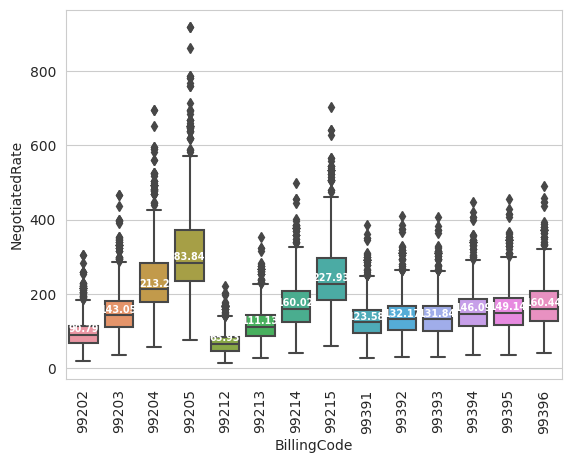

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

box_plot = sns.boxplot(x="BillingCode",y="NegotiatedRate",data=XPrimary)

medians = XPrimary.groupby(['BillingCode'])['NegotiatedRate'].median()
vertical_offset = XPrimary['NegotiatedRate'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

box_plot.tick_params(axis='x', rotation=90)

https://www.includehelp.com/python/normalize-dataframe-by-group.aspx

https://stackoverflow.com/questions/74073396/pandas-how-to-normalize-a-column-after-groupby


In [ ]:
groupedBillingCode = XPrimary.groupby('BillingCode')

In [ ]:
XPrimary['NegotiatedRateScaled'] = groupedBillingCode['NegotiatedRate'].transform(lambda x: (x-x.mean()) / x.std())

<ipython-input-35-30218e181ed4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XPrimary['NegotiatedRateScaled'] = groupedBillingCode['NegotiatedRate'].transform(lambda x: (x-x.mean()) / x.std())


In [ ]:
XPrimary

,ReportingEntityName,ReportingEntityType,LastUpdated,Version,Negotiation_Arrangement,Name,BillingCodeType,BillingCodeTypeVersion,BillingCode,Description,NegotiatedType,NegotiatedRate,ExpirationDate,BillingClass,AdditionalInformation,ProviderGroupId,NegotiatedRateScaled
7675674,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,20.55,2023-03-31,professional,,6397,-1.881772
7675675,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,22.60,2023-03-31,professional,,8579,-1.831962
7675676,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,25.98,2023-03-31,professional,,8677,-1.749836
7675677,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,30.75,2023-03-31,professional,,6397,-1.633937
7675678,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,31.09,2023-03-31,professional,,8413,-1.625676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741967,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,PREV VISIT EST AGE 40-64,CPT,2023,99396,PERIODIC COMPREHENSIVE PREVENTIVE MEDICINE REE...,fee schedule,438.00,2023-03-31,professional,,8928,3.909534
7741968,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,PREV VISIT EST AGE 40-64,CPT,2023,99396,PERIODIC COMPREHENSIVE PREVENTIVE MEDICINE REE...,fee schedule,447.86,2023-03-31,professional,,8587,4.056546
7741969,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,PREV VISIT EST AGE 40-64,CPT,2023,99396,PERIODIC COMPREHENSIVE PREVENTIVE MEDICINE REE...,fee schedule,447.86,2023-03-31,professional,,9267,4.056546
7741970,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,PREV VISIT EST AGE 40-64,CPT,2023,99396,PERIODIC COMPREHENSIVE PREVENTIVE MEDICINE REE...,fee schedule,458.17,9999-12-31,professional,,6370,4.210267


### standardize the rates

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#XPrimary[['NegotiatedRateScaled']] = StandardScaler().fit_transform(XPrimary[['NegotiatedRate']])
XPrimary.groupby('BillingCode').transform(lambda x: (x - x.mean()) / x.std())


<ipython-input-37-1e4fd4dbfbd1>:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  XPrimary.groupby('BillingCode').transform(lambda x: (x - x.mean()) / x.std())
<ipython-input-37-1e4fd4dbfbd1>:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  XPrimary.groupby('BillingCode').transform(lambda x: (x - x.mean()) / x.std())


,NegotiatedRate,ProviderGroupId,NegotiatedRateScaled
7675674,-1.881772,-1.808510,-1.881772
7675675,-1.831962,0.310323,-1.831962
7675676,-1.749836,0.405486,-1.749836
7675677,-1.633937,-1.808510,-1.633937
7675678,-1.625676,0.149129,-1.625676
...,...,...,...
7741967,3.909534,0.650767,3.909534
7741968,4.056546,0.320020,4.056546
7741969,4.056546,0.979574,4.056546
7741970,4.210267,-1.830318,4.210267


In [ ]:
XPrimary.head(5)

,ReportingEntityName,ReportingEntityType,LastUpdated,Version,Negotiation_Arrangement,Name,BillingCodeType,BillingCodeTypeVersion,BillingCode,Description,NegotiatedType,NegotiatedRate,ExpirationDate,BillingClass,AdditionalInformation,ProviderGroupId,NegotiatedRateScaled
7675674,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,20.55,2023-03-31,professional,,6397,-1.881772
7675675,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,22.60,2023-03-31,professional,,8579,-1.831962
7675676,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,25.98,2023-03-31,professional,,8677,-1.749836
7675677,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,30.75,2023-03-31,professional,,6397,-1.633937
7675678,Harvard Pilgrim Health Care Inc.,THIRD PARTY ADMINISTRATOR,2023-02-03,1.3.1,ffs,OFFICE/OUTPATIENT VISIT NEW,CPT,2023,99202,OFFICE OR OTHER OUTPATIENT VISIT FOR THE EVALU...,fee schedule,31.09,2023-03-31,professional,,8413,-1.625676


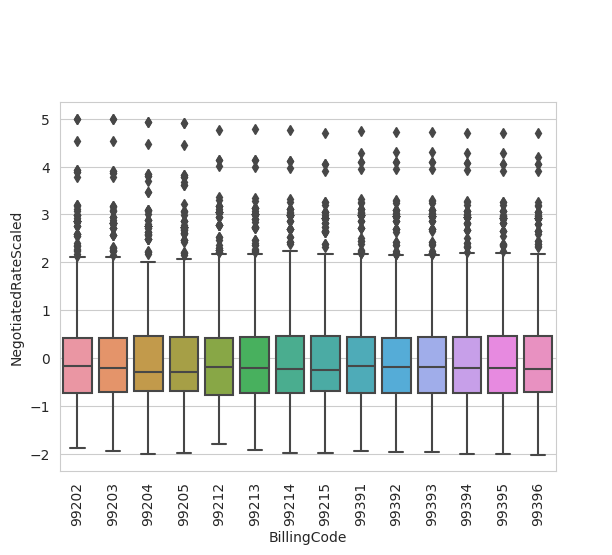

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

box_plot = sns.boxplot(x="BillingCode",y="NegotiatedRateScaled",data=XPrimary)

medians = XPrimary.groupby(['BillingCode'])['NegotiatedRateScaled'].median()
vertical_offset = XPrimary['NegotiatedRate'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick],
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

box_plot.tick_params(axis='x', rotation=90)

check the scaling results by group

In [ ]:
averageStdPriceByProviderGroup = XPrimary.groupby("ProviderGroupId")["NegotiatedRateScaled"].mean()

In [ ]:
averageStdPriceByProviderGroup

ProviderGroupId
6306   -0.163540
6307   -0.386053
6308   -0.577118
6309   -0.181543
6310   -0.221488
          ...   
9335    2.207801
9386   -0.398325
9425    2.207801
9433    0.890018
9435    0.376749
Name: NegotiatedRateScaled, Length: 584, dtype: float64

In [ ]:
type(averageStdPriceByProviderGroup)

pandas.core.series.Series

<Axes: xlabel='NegotiatedRateScaled', ylabel='Count'>

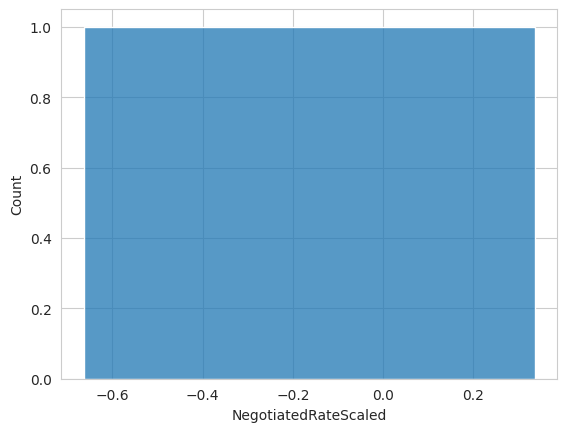

In [ ]:
sns.histplot(data=averageStdPriceByProviderGroup, x=averageStdPriceByProviderGroup.iloc[:1])

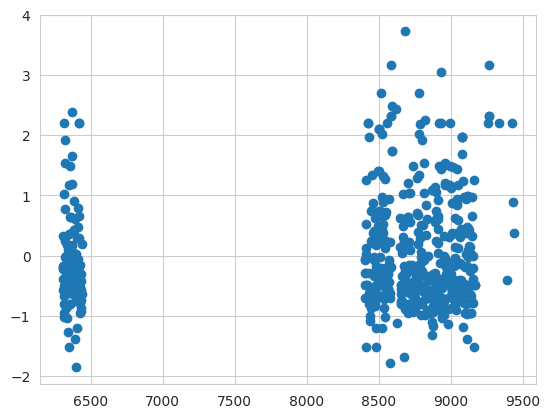

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(averageStdPriceByProviderGroup.index, averageStdPriceByProviderGroup)
plt.show()


# Look at the provider group for more info

In [ ]:
dict_in_network_providers

{6306: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_2_provider-references.zip',
 6307: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_3_provider-references.zip',
 6308: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_6_provider-references.zip',
 6309: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_7_provider-references.zip',
 6310: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_14_provider-references.zip',
 6311: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_15_provider-references.zip',
 6312: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_39_provider-references.zip',
 6313: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-01_A077_FS_60_provider-references.zip',
 6314: 'https://eusprdtransparencymrfp32.blob.core.windows.net/hphc/2023-02-

can find these here:
https://npiregistry.cms.hhs.gov/search
https://npiregistry.cms.hhs.gov/provider-view/1760881627
